# Shelter Animals Outcomes
## Kaggle Problem #4

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('/home/najeeb/Desktop/Dataset/Shelter Animals/train.csv',index_col=0)
data.describe()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,6374,22918,5,16,2,5,44,1380,366
top,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,136,19,10769,7816,15595,9779,3969,8810,2824


In [4]:
data.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
AnimalID,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26729 entries, A671945 to A706629
Data columns (total 9 columns):
Name              19038 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(9)
memory usage: 2.0+ MB


## Statistical Classification based on Outcome Type

[('2 years', 917), ('1 year', 732)]


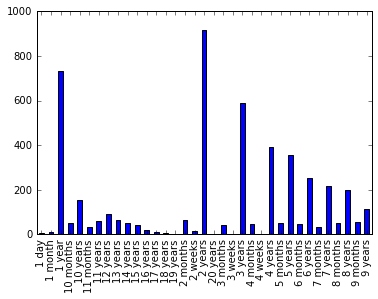

In [6]:
## Statistics about 'Return_to_Owner'
counter_owner = Counter(data[data['OutcomeType'] == 'Return_to_owner']['AgeuponOutcome'].values)
print counter_owner.most_common(2)
Owner = pd.Series(counter_owner)
Owner.plot(kind='bar')

[('2 years', 275), ('1 year', 184)]


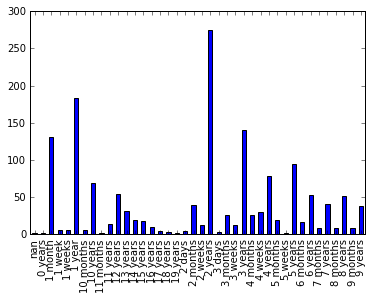

In [7]:
## Statistics about 'Euthanasia'
counter_euthanasia = Counter(data[data['OutcomeType'] == 'Euthanasia']['AgeuponOutcome'].values)
print counter_euthanasia.most_common(2)
Euthanasia = pd.Series(counter_euthanasia)
Euthanasia.plot(kind='bar')

[('2 months', 2636), ('1 year', 1623)]


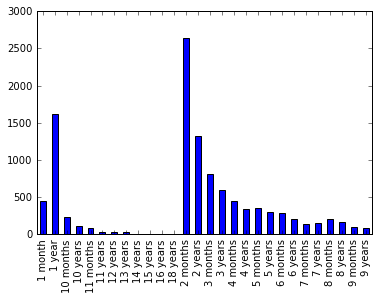

In [8]:
## Statistics about 'Adoption'
counter_adoption = Counter(data[data['OutcomeType'] == 'Adoption']['AgeuponOutcome'].values)
print counter_adoption.most_common(2)
Adoption = pd.Series(counter_adoption)
Adoption.plot(kind='bar')

[('1 year', 1417), ('2 years', 1214)]


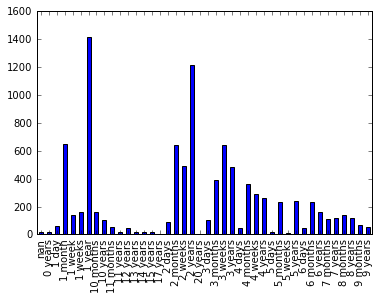

In [9]:
## Statistics about 'Transfer'
counter_transfer = Counter(data[data['OutcomeType'] == 'Transfer']['AgeuponOutcome'].values)
print counter_transfer.most_common(2)
Transfer = pd.Series(counter_transfer)
Transfer.plot(kind='bar')

[('1 month', 48), ('2 years', 17)]


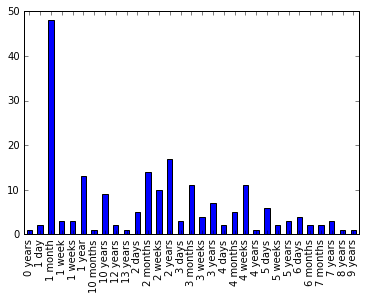

In [10]:
## Statistics about 'Died'
counter_died = Counter(data[data['OutcomeType'] == 'Died']['AgeuponOutcome'].values)
print counter_died.most_common(2)
Died = pd.Series(counter_died)
Died.plot(kind='bar')

## Statistical Classification Based on Animal Type & Outcome Type

In [11]:
def create_series(cname,atype):
    filtered_data = data[data['OutcomeType'] == cname]
    counter = Counter(filtered_data[filtered_data['AnimalType'] == atype]['AgeuponOutcome'].values)
    print counter.most_common(2)
    return pd.Series(counter)

Cat
[('2 years', 97), ('1 year', 70)]


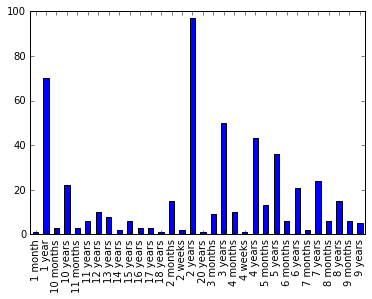

Dog
[('2 years', 820), ('1 year', 662)]


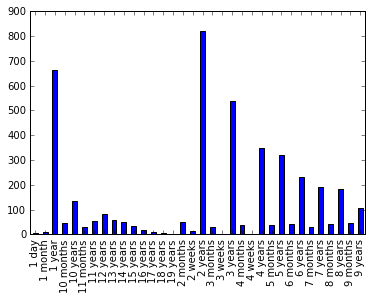

In [12]:
# Statistics about Return_to_owner
print 'Cat'
cat_owner = create_series('Return_to_owner','Cat')
cat_owner.plot(kind='bar')
plt.show()
print 'Dog'
dog_owner = create_series('Return_to_owner',"Dog")
dog_owner.plot(kind='bar')

Cat
[('1 month', 112), ('2 years', 84)]


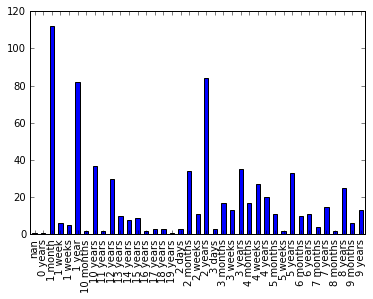

Dog
[('2 years', 191), ('3 years', 106)]


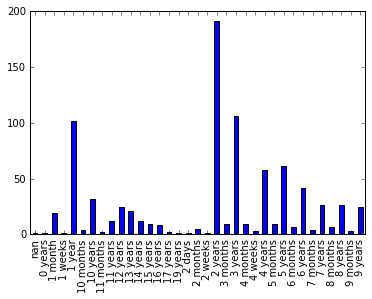

In [13]:
# Statistics about Euthanasia
print 'Cat'
cat_euthanasia = create_series('Euthanasia','Cat')
cat_euthanasia.plot(kind='bar')
plt.show()
print 'Dog'
dog_euthanasia = create_series('Euthanasia',"Dog")
dog_euthanasia.plot(kind='bar')

Cat
[('1 year', 791), ('3 weeks', 616)]


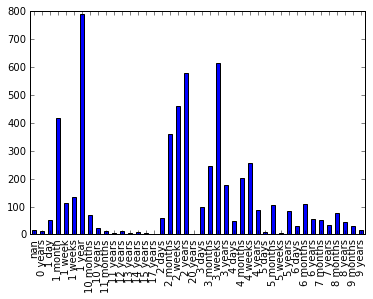

Dog
[('2 years', 636), ('1 year', 626)]


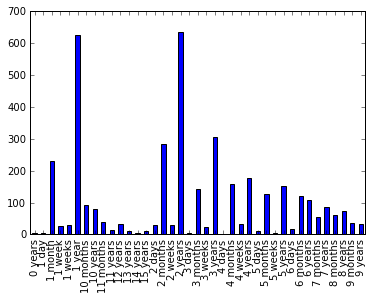

In [14]:
# Statistics about Return_to_owner
print 'Cat'
cat_transfer = create_series('Transfer','Cat')
cat_transfer.plot(kind='bar')
plt.show()
print 'Dog'
dog_transfer = create_series('Transfer',"Dog")
dog_transfer.plot(kind='bar')

Cat
[('2 months', 1799), ('3 months', 606)]


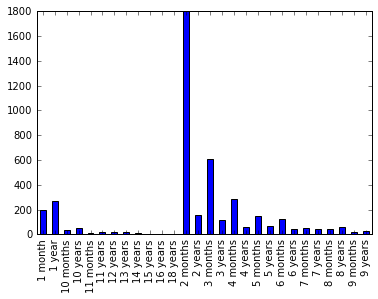

Dog
[('2 years', 636), ('1 year', 626)]


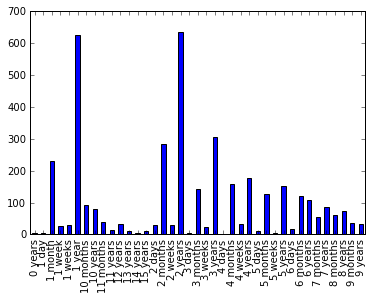

In [15]:
# Statistics about Return_to_owner
print 'Cat'
cat_adoption = create_series('Adoption','Cat')
cat_adoption.plot(kind='bar')
plt.show()
print 'Dog'
dog_adoption = create_series('Transfer',"Dog")
dog_adoption.plot(kind='bar')

Cat
[('1 month', 45), ('2 months', 13)]


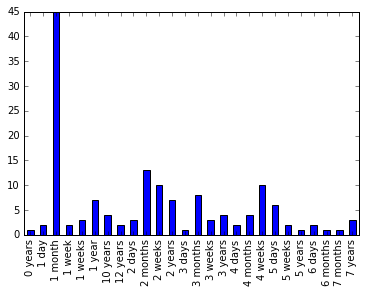

Dog
[('2 years', 10), ('1 year', 6)]


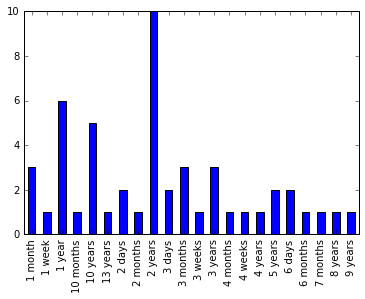

In [16]:
# Statistics about Return_to_owner
print 'Cat'
cat_died = create_series('Died','Cat')
cat_died.plot(kind='bar')
plt.show()
print 'Dog'
dog_died = create_series('Died',"Dog")
dog_died.plot(kind='bar')

### Condensing the Statistics

In [18]:
ages = data['AgeuponOutcome'].unique().tolist()
outcome = data['OutcomeType'].unique().tolist()

In [22]:
def get_max_outcome(atype,ages,outcome):
    maximum = dict()
    animal_data = data[data['AnimalType'] == atype]
    for i in ages:
        max_count = 0
        for j in outcome:
            filtered_data = animal_data[animal_data['AgeuponOutcome'] == i]
            count = filtered_data[filtered_data['OutcomeType'] == j]['OutcomeType'].count()
            if count > max_count:
                max_count,max_outcome = count,j
        maximum[i] = max_outcome
    return maximum

In [24]:
cat_stats = get_max_outcome('Cat',ages,outcome)
dog_stats = get_max_outcome('Dog',ages,outcome)

### Bringing in the test data

In [37]:
def one_hot(outcome_type):
    outcomes = ['Adoption','Died','Euthanasia','Return_to_owner','Transfer']
    result  = [0,0,0,0,0]
    result[outcomes.index(outcome_type)] = 1
    return result

In [52]:
test = pd.read_csv('/home/najeeb/Desktop/Dataset/Shelter Animals/test.csv',index_col=0)
test.head()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11456 entries, 1 to 11456
Data columns (total 7 columns):
Name              8231 non-null object
DateTime          11456 non-null object
AnimalType        11456 non-null object
SexuponOutcome    11456 non-null object
AgeuponOutcome    11450 non-null object
Breed             11456 non-null object
Color             11456 non-null object
dtypes: object(7)
memory usage: 716.0+ KB


In [53]:
import csv
import os
fname = '/home/najeeb/Desktop/Dataset/Shelter Animals/submission.csv'
try:
    os.remove(fname)
except:
    pass
with open(fname,'wb') as fp:
    p = csv.writer(fp)
    p.writerow(['ID','Adoption','Died','Euthanasia','Return_to_owner','Transfer'])
    for i in test.index:
        animal = test.iloc[i-1]
        if  animal['AnimalType'] == 'Cat':
            try:
                outcome_type = cat_stats[animal['AgeuponOutcome']]
            except:
                outcome_type = 'Adoption'
        elif animal['AnimalType'] == 'Dog':
            try:
                outcome_type = dog_stats[animal['AgeuponOutcome']]
            except:
                outcome_type = 'Adoption'
        p.writerow([i]+one_hot(outcome_type))
        